In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
sns.set_style("whitegrid")
# Bigger font
# sns.set_context("poster")
sns.set_context("talk")
# Figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 4
# np.random.seed(123)

Another model we can program would predict the number of product sells (for each type of product) in that month (the most obvious approach).

But the way to do this may not be too straightforward.

I'll explore every csv given.

In [2]:
items  = pd.read_csv('data/items.csv')
train = pd.read_csv('data/sales_train.csv.gz')
test = pd.read_csv('data/test.csv.gz')
item_category = pd.read_csv('data/item_categories.csv')
shops = pd.read_csv('data/shops.csv')

print(train.dtypes)
train.head(2)

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


The first thing to do is to convert date to a time column

In [3]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')

## Data Exploration

In [4]:
def eda(data):
    print("----------Top-5- Record----------")
    print(data.head(5))
    print("-----------Information-----------")
    print(data.info())
    print("----------Missing value-----------")
    print(data.isnull().sum())
    print("----------Null value-----------")
    print(data.isna().sum())
    print("----------Shape of Data----------")
    print(data.shape)

def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);

## 1. Train data

In [5]:
eda(train)

----------Top-5- Record----------
        date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0 2013-01-02               0       59    22154      999.00           1.0
1 2013-01-03               0       25     2552      899.00           1.0
2 2013-01-05               0       25     2552      899.00          -1.0
3 2013-01-06               0       25     2554     1709.05           1.0
4 2013-01-15               0       25     2555     1099.00           1.0
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB
None
----------Missing value-----------
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day  

## 2. Test data

In [6]:
eda(test)

----------Top-5- Record----------
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB
None
----------Missing value-----------
ID         0
shop_id    0
item_id    0
dtype: int64
----------Null value-----------
ID         0
shop_id    0
item_id    0
dtype: int64
----------Shape of Data----------
(214200, 3)


## 3. Item data

In [7]:
eda(items)

----------Top-5- Record----------
                                           item_name  item_id  item_category_id
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0                40
1  !ABBYY FineReader 12 Professional Edition Full...        1                76
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2                40
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3                40
4        ***КОРОБКА (СТЕКЛО)                       D        4                40
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
----------Missing value-----------
item_name           0
item_id             0
item_category_id    0
dtype: int64
----------Null value-----------
item_name        

## 4. Item category

In [8]:
eda(item_category)

----------Top-5- Record----------
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
----------Missing value-----------
item_category_name    0
item_category_id      0
dtype: int64
----------Null value-----------
item_category_name    0
item_category_id      0
dtype: int64
----------Shape of Data----------
(84, 2)


## 5. Shops data

In [9]:
eda(shops)

----------Top-5- Record----------
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None
----------Missing value-----------
shop_name    0
shop_id      0
dtype: int64
----------Null value-----------
shop_name    0
shop_id      0
dtype: int64
----------Shape of Data----------
(60, 2)


## Finding Seasonality

As I was expecting, items are sold more in winter and summer.

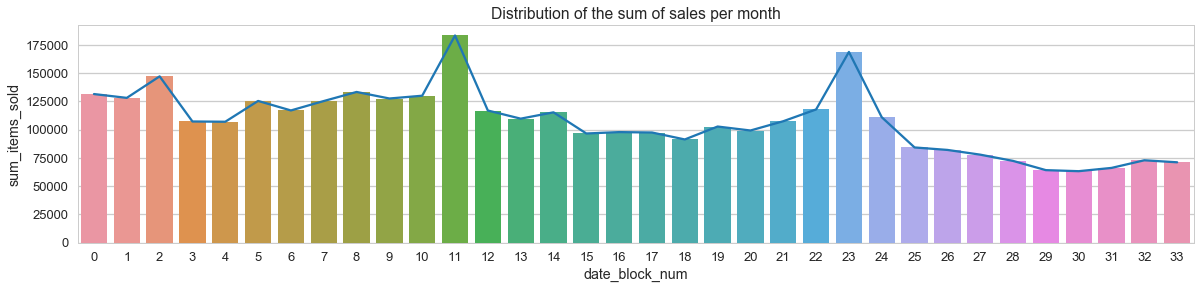

In [21]:
sales_month = pd.DataFrame(train.groupby(['date_block_num']).sum().item_cnt_day).reset_index()
sales_month.columns = ['date_block_num', 'sum_items_sold']
sns.barplot(x ='date_block_num', y='sum_items_sold', 
            data=sales_month.reset_index());
plt.plot(sales_month.sum_items_sold)
plt.title('Distribution of the sum of sales per month')
del sales_month

This other one shows that some stores sell more than other, so shop_id might be a good feature. Or maybe I will make it interact with others.

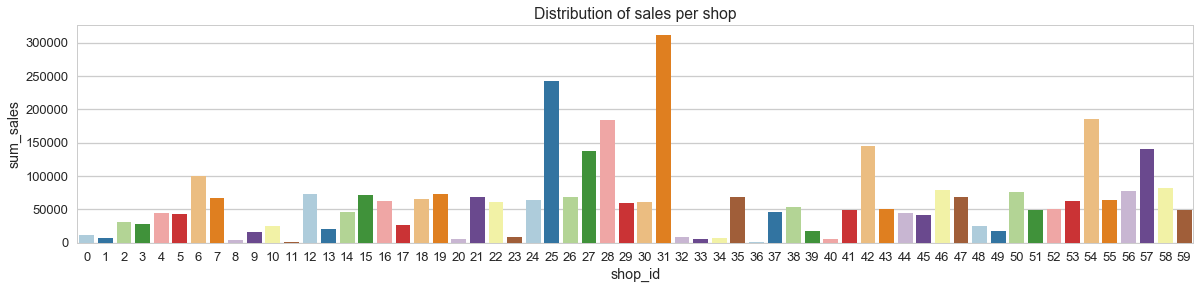

In [22]:
sales_month_shop_id = pd.DataFrame(train.groupby(['shop_id']).sum().item_cnt_day).reset_index()
sales_month_shop_id.columns = ['shop_id', 'sum_sales']
sns.barplot(x ='shop_id', y='sum_sales', data=sales_month_shop_id, palette='Paired')
plt.title('Distribution of sales per shop');
del sales_month_shop_id

## Finding Patterns

#### 1. Sells per item id

This graph would take too long, so the product category will be plotted.

#### 2. Sells per shop

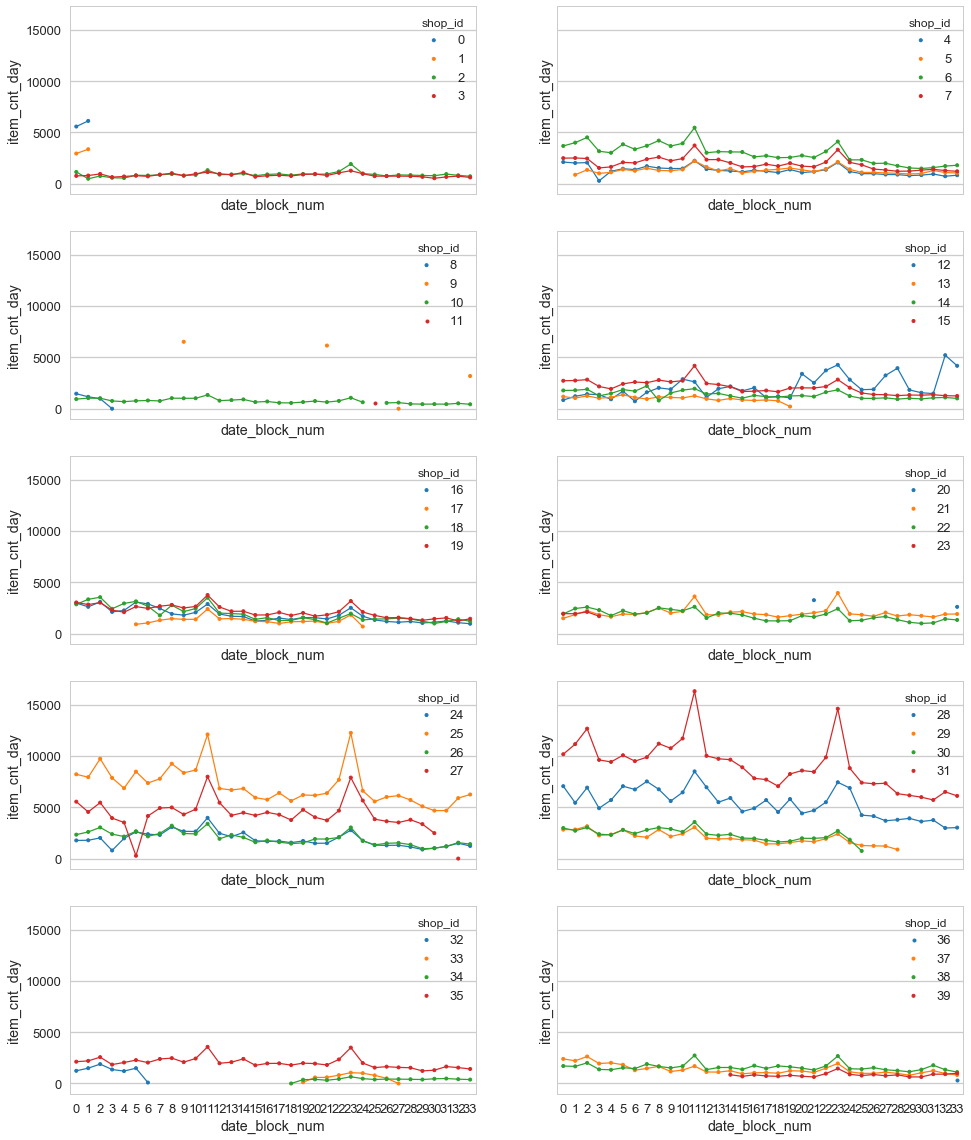

In [12]:
## grouped so as to reduce the number of rows
grouped = pd.DataFrame(train.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index())
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 15
id_per_graph = np.ceil(grouped['shop_id'].max() / num_graph)
count = 0

for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='shop_id',
                      data=grouped[np.logical_and(count*id_per_graph <= grouped['shop_id'], grouped['shop_id'] < (count+1)*id_per_graph)],
                      ax=axes[i][j], scale = .3)
        count += 1

Pattern: It looks like some shops have peaks.

#### 3. Sells per category

Joining train with the items data.

In [13]:
# add categories
train = train.set_index('item_id').join(items.set_index('item_id')).drop('item_name', axis=1).reset_index()
train.head(2)

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_id
0,0,2014-09-01,20,54,58.0,1.0,40
1,1,2014-04-04,15,55,4490.0,1.0,76


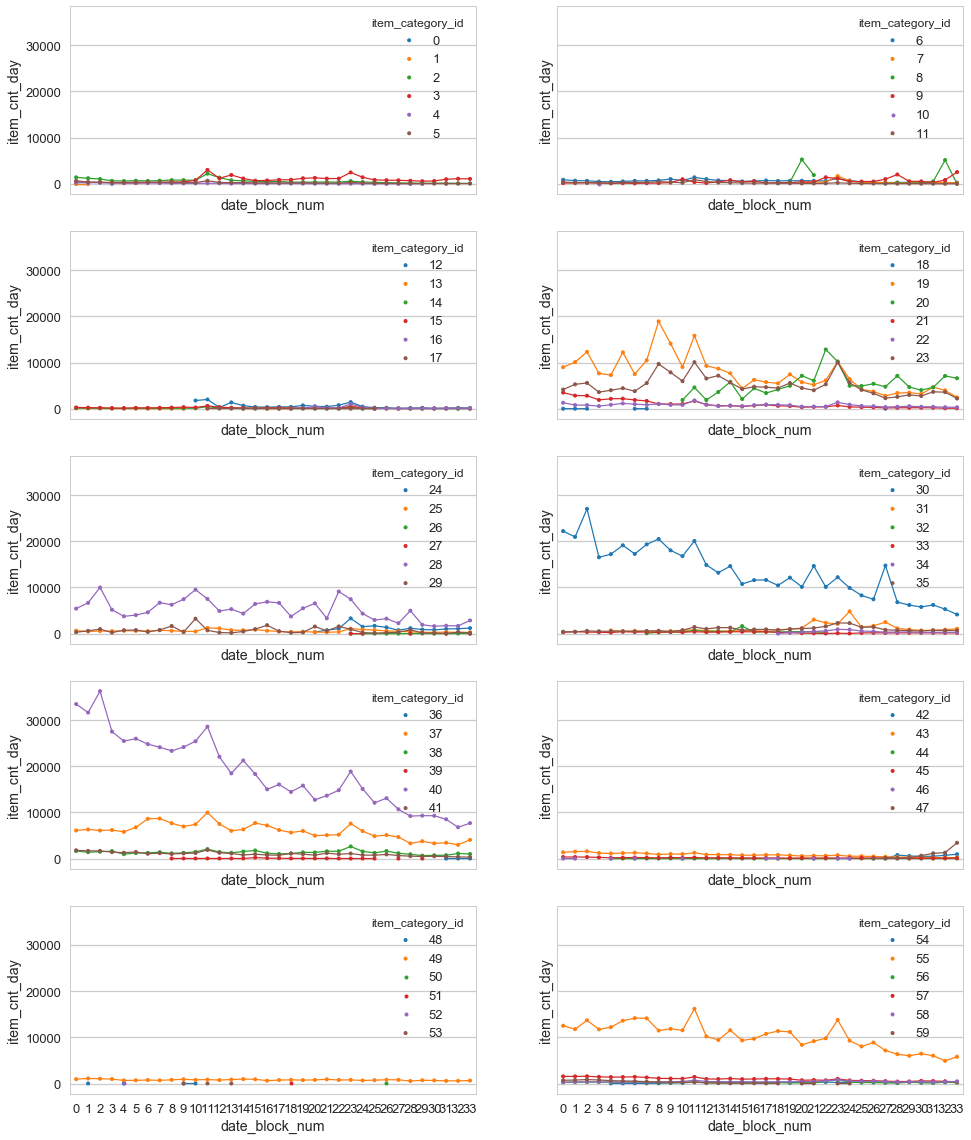

In [14]:
grouped = pd.DataFrame(train.groupby(['item_category_id', 'date_block_num'])['item_cnt_day'].sum().reset_index())
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 15
id_per_graph = np.ceil(grouped['item_category_id'].max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='item_category_id', 
                      data=grouped[np.logical_and(count*id_per_graph <= grouped['item_category_id'], grouped['item_category_id'] < (count+1)*id_per_graph)], 
                      ax=axes[i][j], scale = .3)
        count += 1

Pattern: Some categories have peaks.

#### 4. Product Price

In [15]:
train['item_price'].describe()

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

In [16]:
train['item_price_binlabel'] = pd.qcut(train['item_price'], 60, labels=False, duplicates='drop')
train['item_price_bin'] = pd.qcut(train['item_price'], 60, duplicates='drop')
train.head()

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_id,item_price_binlabel,item_price_bin
0,0,2014-09-01,20,54,58.0,1.0,40,1,"(30.0, 98.0]"
1,1,2014-04-04,15,55,4490.0,1.0,76,36,"(3999.0, 307980.0]"
2,1,2014-04-02,15,55,4490.0,1.0,76,36,"(3999.0, 307980.0]"
3,1,2014-07-06,18,55,4490.0,1.0,76,36,"(3999.0, 307980.0]"
4,1,2014-08-04,19,55,4490.0,1.0,76,36,"(3999.0, 307980.0]"


In [17]:
np.sort(train['item_price_bin'].unique())

array([Interval(-1.001, 30.0, closed='right'),
       Interval(30.0, 98.0, closed='right'),
       Interval(98.0, 99.0, closed='right'),
       Interval(99.0, 149.0, closed='right'),
       Interval(149.0, 169.0, closed='right'),
       Interval(169.0, 199.0, closed='right'),
       Interval(199.0, 229.0, closed='right'),
       Interval(229.0, 249.0, closed='right'),
       Interval(249.0, 250.0, closed='right'),
       Interval(250.0, 299.0, closed='right'),
       Interval(299.0, 339.0, closed='right'),
       Interval(339.0, 349.0, closed='right'),
       Interval(349.0, 399.0, closed='right'),
       Interval(399.0, 419.0, closed='right'),
       Interval(419.0, 449.0, closed='right'),
       Interval(449.0, 499.0, closed='right'),
       Interval(499.0, 549.0, closed='right'),
       Interval(549.0, 599.0, closed='right'),
       Interval(599.0, 649.0, closed='right'),
       Interval(649.0, 699.0, closed='right'),
       Interval(699.0, 799.0, closed='right'),
       Interval(79

In [18]:
grouped.head()

,item_category_id,date_block_num,item_cnt_day
0,0,0,1.0
1,0,1,1.0
2,0,3,1.0
3,1,0,1.0
4,1,1,1.0


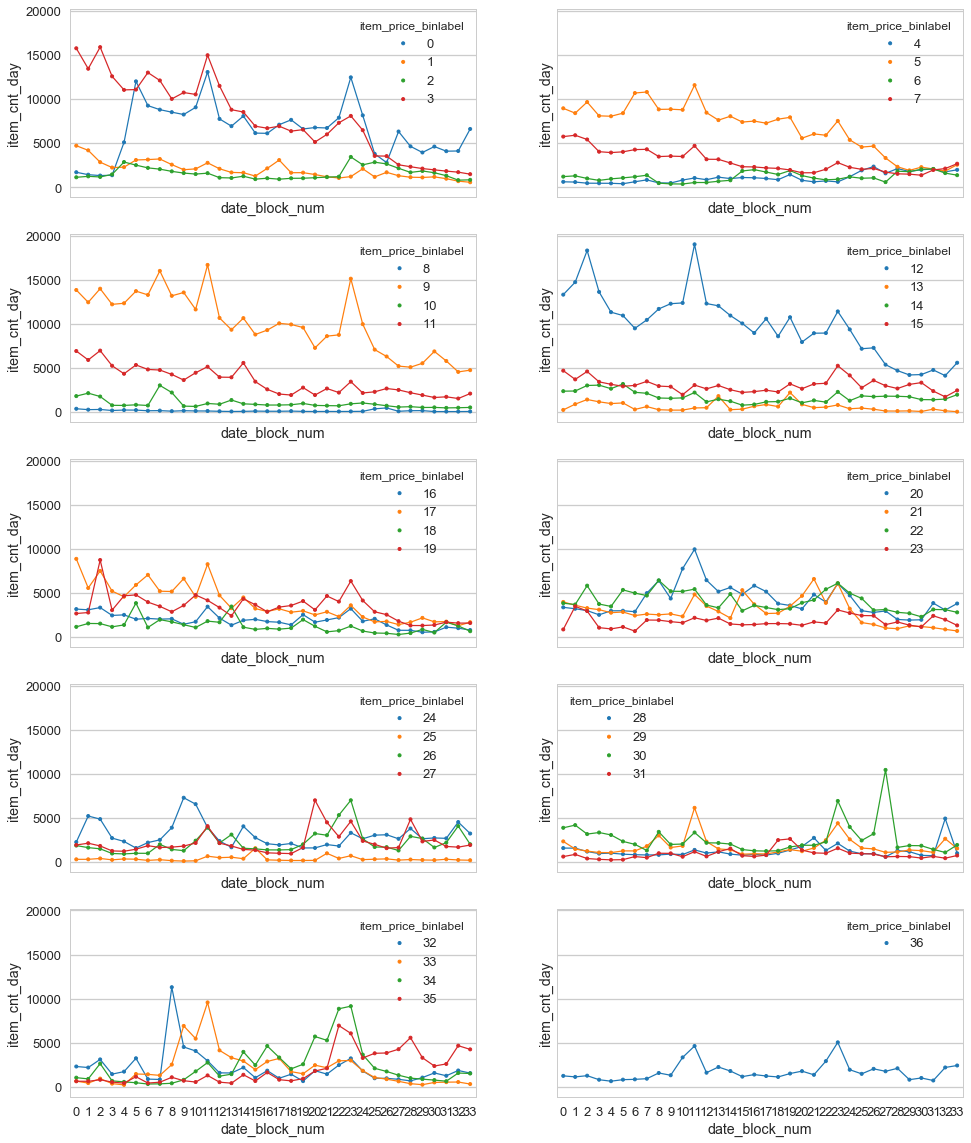

In [19]:
grouped = pd.DataFrame(train.groupby(['item_price_binlabel', 'date_block_num'])['item_cnt_day'].sum().reset_index())
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = np.ceil(grouped['item_price_binlabel'].max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        ax = sns.pointplot(x='date_block_num', y='item_cnt_day', hue='item_price_binlabel',
                      data=grouped[np.logical_and(count*id_per_graph <= grouped['item_price_binlabel'], grouped['item_price_binlabel'] < (count+1)*id_per_graph)], 
                      ax=axes[i][j], scale = .3)
        count += 1

Pattern: Some product prices are sold more.